# Black Friday Prediction

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('blackFriday_train.csv')

test_df = pd.read_csv('blackFriday_test.csv')

### Data Shape

In [3]:
print('Shape of Train Data',train_df.shape)

print('Shape of Test Data', test_df.shape)

Shape of Train Data (550068, 12)
Shape of Test Data (233599, 11)


In [4]:
pd.set_option('display.max_columns',None)

In [5]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
train_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Obseravtion
1. There are 550,068 observations in the dataset.
2. The Marital_Status variable catogorical column, with 0 indicating that the user is not married and 1 indicating that the user is married.
3. The Product_Category_1 variable ranges from 1 to 20.
4. The Product_Category_2 variable ranges from 2 to 18.
5. The Product_Category_3 variable ranges from 3 to 18.
6. Purchace is target Variable

### Missing Values

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
train_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

### Imputing Missing values with KNN Imputer

In [10]:
from sklearn.impute import KNNImputer

In [11]:
KNN_imp = KNNImputer()

In [12]:
# product_1 = pd.DataFrame(KNN_imp.fit_transform(train_df[['Purchase','Product_Category_2']]))

In [13]:
# product_1.head()

In [14]:
# product_2 = product_1

In [15]:
# product_2.to_csv("imputed product 2",index=False)

In [16]:
# train_df['Product_Category_2'] = product_2[1]

#### imputed column already saved as csv file directly creating dataframe name product 2

In [17]:
product_2 = pd.read_csv('imputed product 2')

In [18]:
product_2.head()

,0,1
0,8370.0,4.0
1,15200.0,6.0
2,1422.0,13.0
3,1057.0,14.0
4,7969.0,11.6


In [19]:
train_df['Product_Category_2'] = product_2['1']

### Droping Product category 3
the Product_Category_3 column has a significant number of missing values and the missing values are not informative, 
removing the column reasonable option. This is because having a large number of missing values in a column can affect 
the accuracy and reliability of statistical analyses and machine learning models, and imputing missing values may introduce bias
and reduce the quality of the data

In [20]:
train_df.drop(columns=['Product_Category_3'],inplace=True)
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,4.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,13.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,11.6,7969


In [21]:
train_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


In [23]:
# change dtape of product category 2
train_df['Product_Category_2'] = train_df['Product_Category_2'].astype(int)

In [24]:
train_df['Product_Category_2'].dtype

dtype('int32')

In [25]:
# Drpping unnecessary column
train_df.drop(columns=['User_ID','Product_ID'],inplace=True)
train_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,4,8370
1,F,0-17,10,A,2,0,1,6,15200
2,F,0-17,10,A,2,0,12,13,1422
3,F,0-17,10,A,2,0,12,14,1057
4,M,55+,16,C,4+,0,8,11,7969


## Outlier

In [26]:
for i in train_df:
    print(train_df[i].unique())

['F' 'M']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
['A' 'C' 'B']
['2' '4+' '3' '1' '0']
[0 1]
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[ 4  6 13 14 11  2  8 15 16  7  5  3 12 10  9 17 18]
[ 8370 15200  1422 ...   135   123   613]


<AxesSubplot:>

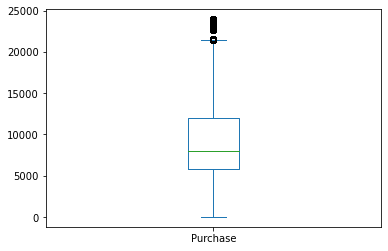

In [27]:
train_df['Purchase'].plot(kind='box')

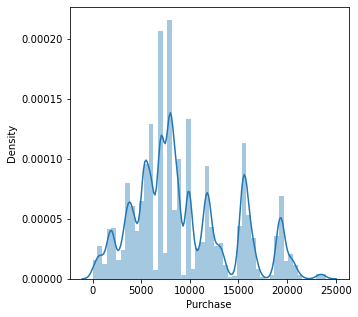

In [28]:
plt.figure(figsize=(5,5))
sns.distplot(train_df['Purchase'])
plt.show()

### Remove Outlier with IQR method

In [29]:
# calculate IQR

q1 = train_df['Purchase'].quantile(0.25)
q3 = train_df['Purchase'].quantile(0.75)

iqr = q3 - q1

In [30]:
purchase_high = q3 + (1.5 * iqr)
purchase_high

21400.5

In [31]:
index = np.where(train_df["Purchase"] > purchase_high)
index

(array([   343,    375,    652, ..., 544743, 545663, 545787], dtype=int64),)

In [32]:
train_df = train_df.drop(train_df.index[index])
train_df.shape

(547391, 9)

<AxesSubplot:>

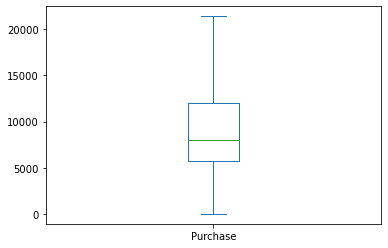

In [33]:
train_df['Purchase'].plot(kind='box')

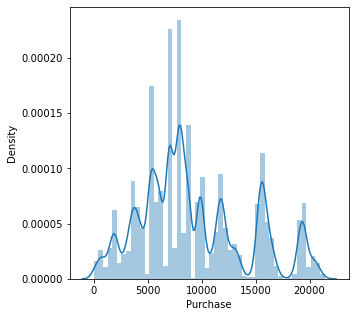

In [34]:
plt.figure(figsize=(5,5))
sns.distplot(train_df['Purchase'])
plt.show()

Purchase Amount Binning

In [35]:
binwidth = int((max(train_df['Purchase'])-min(train_df['Purchase']))/4)

bins = range(min(train_df['Purchase']),max(train_df['Purchase']),binwidth)


In [36]:
for i in bins:
    print(i)

12
5358
10704
16050
21396


In [37]:
bin_name = ['Low','Medium','High','Very High']

In [38]:
train_df['Binned purchase'] = pd.cut(train_df['Purchase'],bins,labels=bin_name)

# EDA

In [39]:
catogorical_column = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Binned purchase']

In [40]:
for i in catogorical_column:
    print(i)
    print(train_df[i].value_counts())
    print('*-*'*20)

Gender
M    412171
F    135220
Name: Gender, dtype: int64
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Age
26-35    218661
36-45    109409
18-25     99334
46-50     45442
51-55     38191
55+       21322
0-17      15032
Name: Age, dtype: int64
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Occupation
4     72040
0     69310
7     58875
1     47174
17    39855
20    33355
12    30995
14    27173
2     26435
16    25251
6     20261
3     17568
10    12888
5     12133
15    12086
11    11500
19     8412
13     7667
18     6595
9      6278
8      1540
Name: Occupation, dtype: int64
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
City_Category
B    230114
C    170241
A    147036
Name: City_Category, dtype: int64
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Stay_In_Current_City_Years
1     192845
2     101384
3      94804
4+     84322
0      74036
Name: Stay_In_Current_City_Years, dtype: int64
*-**-**-**-**-**-**-**-**-**-**-**-**-**-

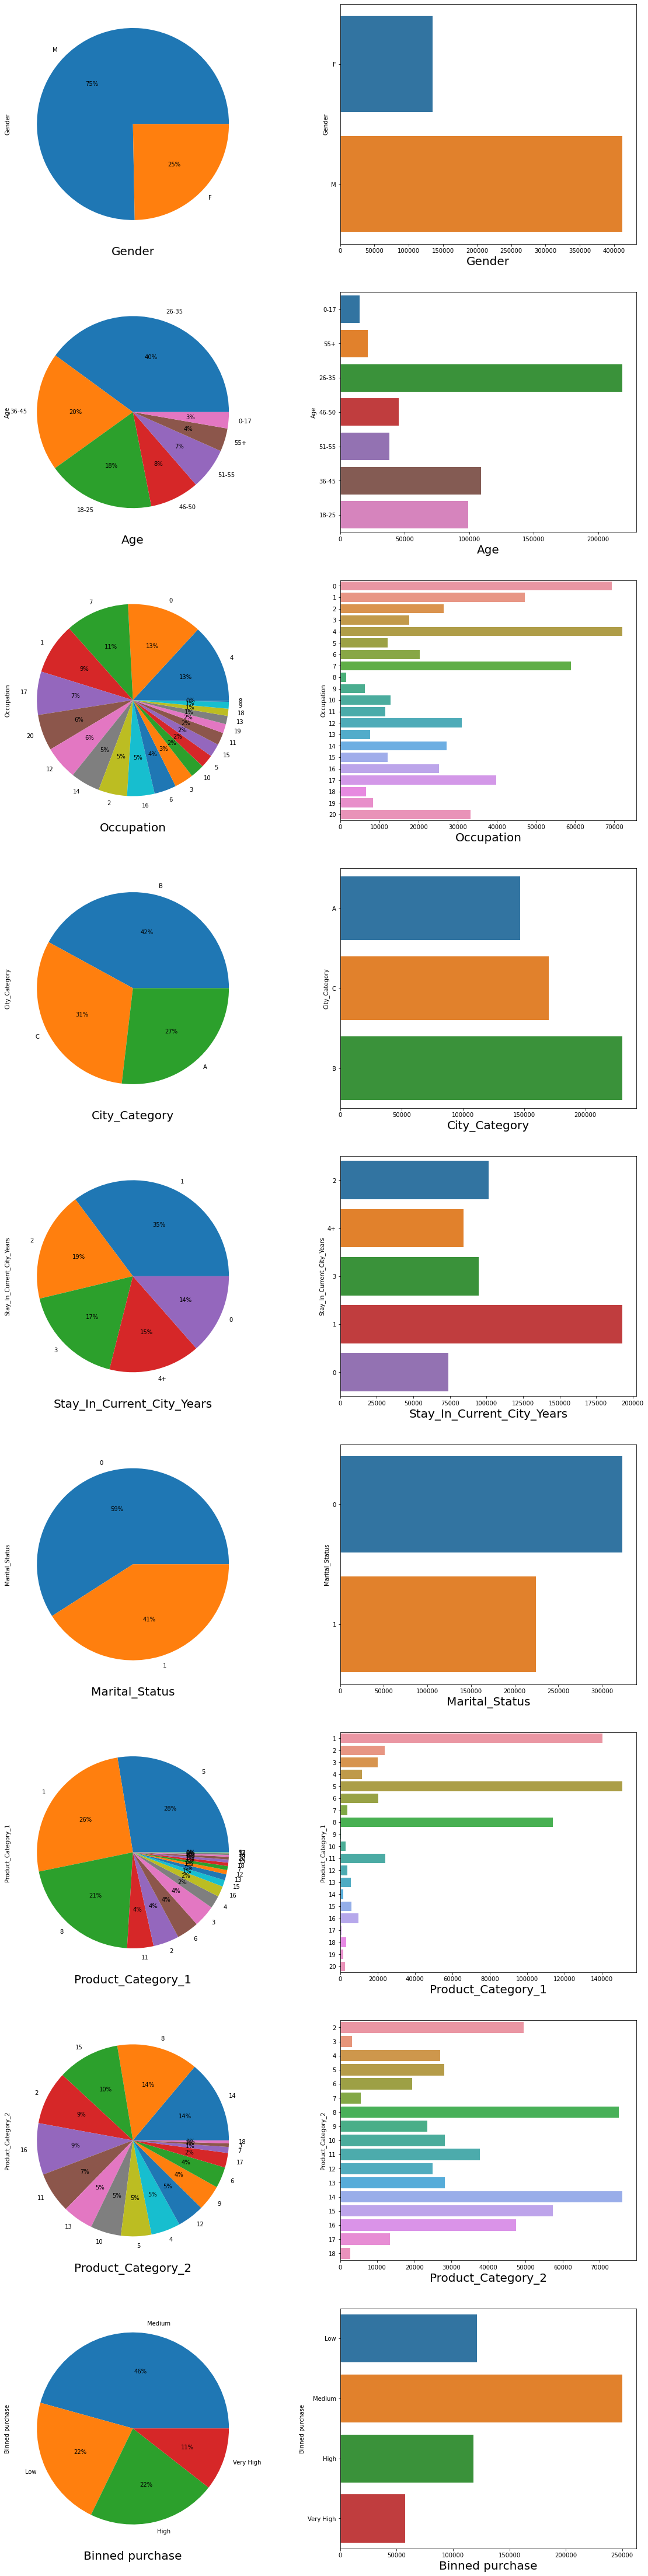

In [41]:
plt.figure(figsize=(20,180))
plotnumber = 1
for i in catogorical_column:
    if plotnumber<=40:
        if plotnumber % 2 != 0:
            ax = plt.subplot(20,2,plotnumber)
            train_df[i].value_counts().plot(kind='pie',autopct='%.0f%%')
            plt.xlabel(i,fontsize=20)
            plotnumber += 1
            
        if plotnumber %2 == 0:
            ax = plt.subplot(20,2,plotnumber)
            sns.countplot(y=train_df[i])
            plt.xlabel(i,fontsize=20)
            plotnumber += 1
            
plt.show()

## Observation
1. 75% of user are male and 25% are female users.
2. 40% of users age is between 26-25 years.36-45 years and 18-25 years user persentage is 20% nad 18% respectively.
3. only 3% user are under 18 yers and 4% user age is above 55 years.
4. 13% user occupation 0 and 4 each.
5. 42% of user are from type B city, 31% and 27% of user are from city category C and A respectively.
6. only 15% of users living in same city for more than 4 years.
7. 54% of the users have lived in the city for less than 2 years.
8. 59% user marital status is 0 assuming that is unmarried.
9. 28% of product are belongs to category 5 and 26%, 21% of product belongs to 1 and 8 respectively.
10. less than 1% of order are for category 9 and 17 product.
11. 46% of shopper or user are fall under medium purchase amount category.
12. 33% of shopper purchase above 10000 purchase amount that mean they are fall in high and very high category.

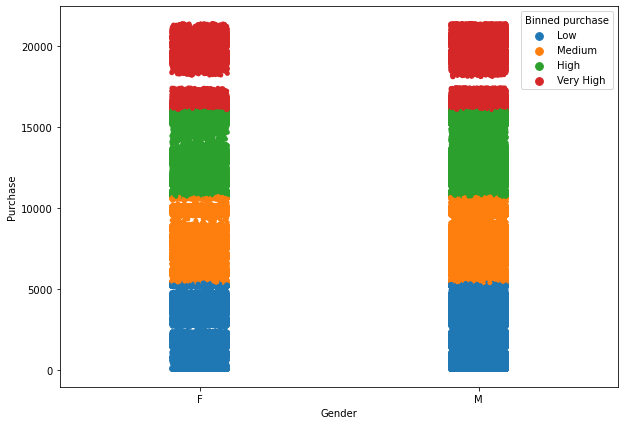

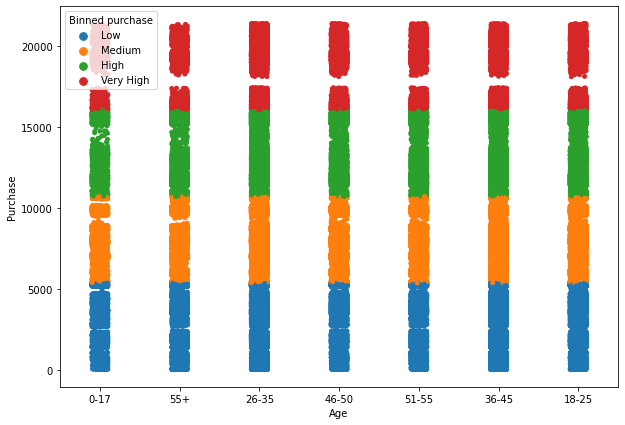

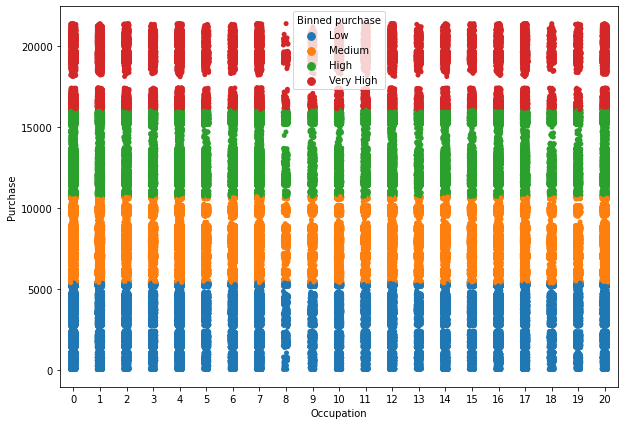

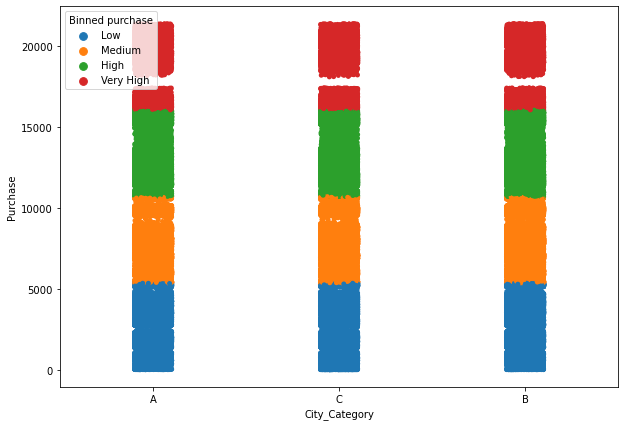

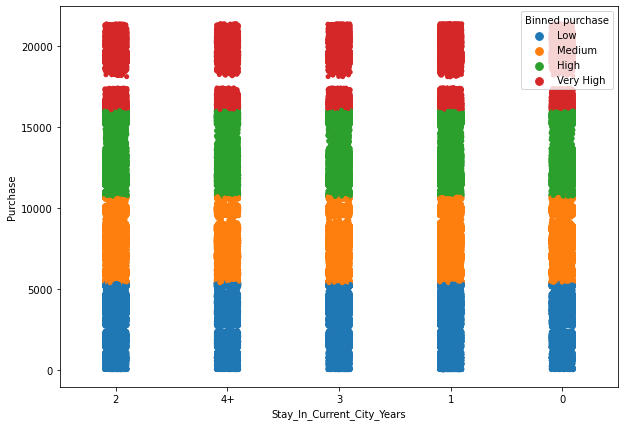

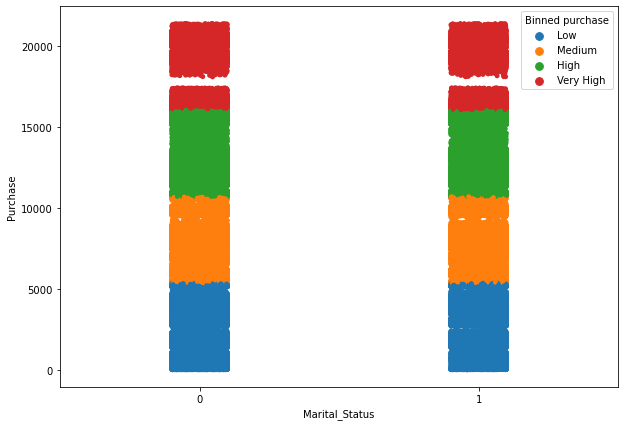

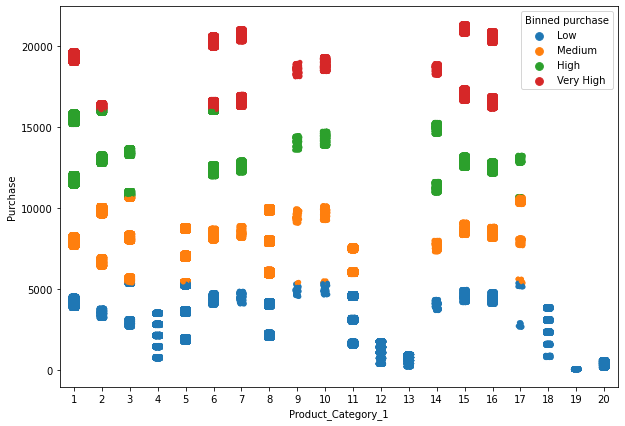

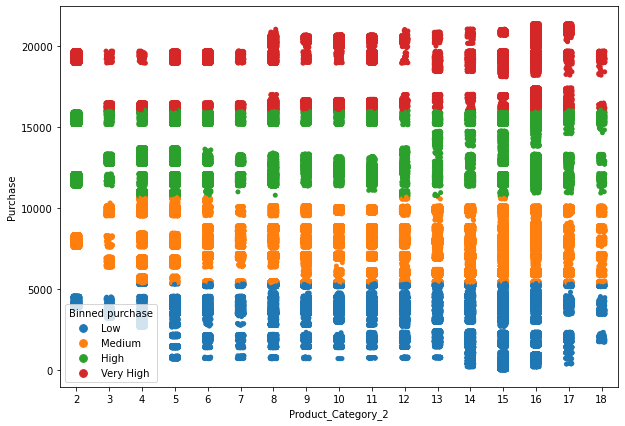

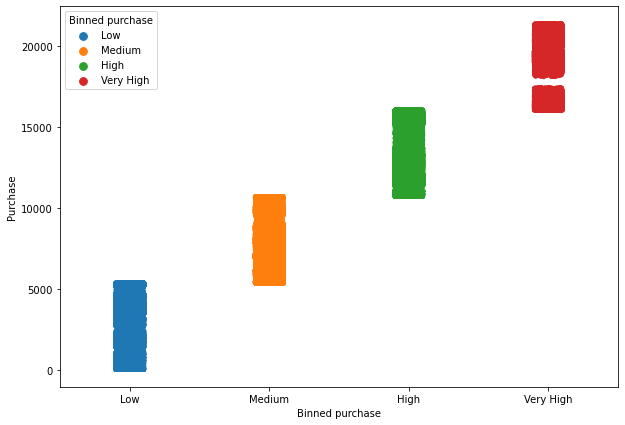

In [42]:
for i in catogorical_column:
    plt.figure(figsize=(10,7))
    sns.stripplot(train_df[i],train_df['Purchase'],hue=train_df["Binned purchase"],data=train_df)
    plt.show()

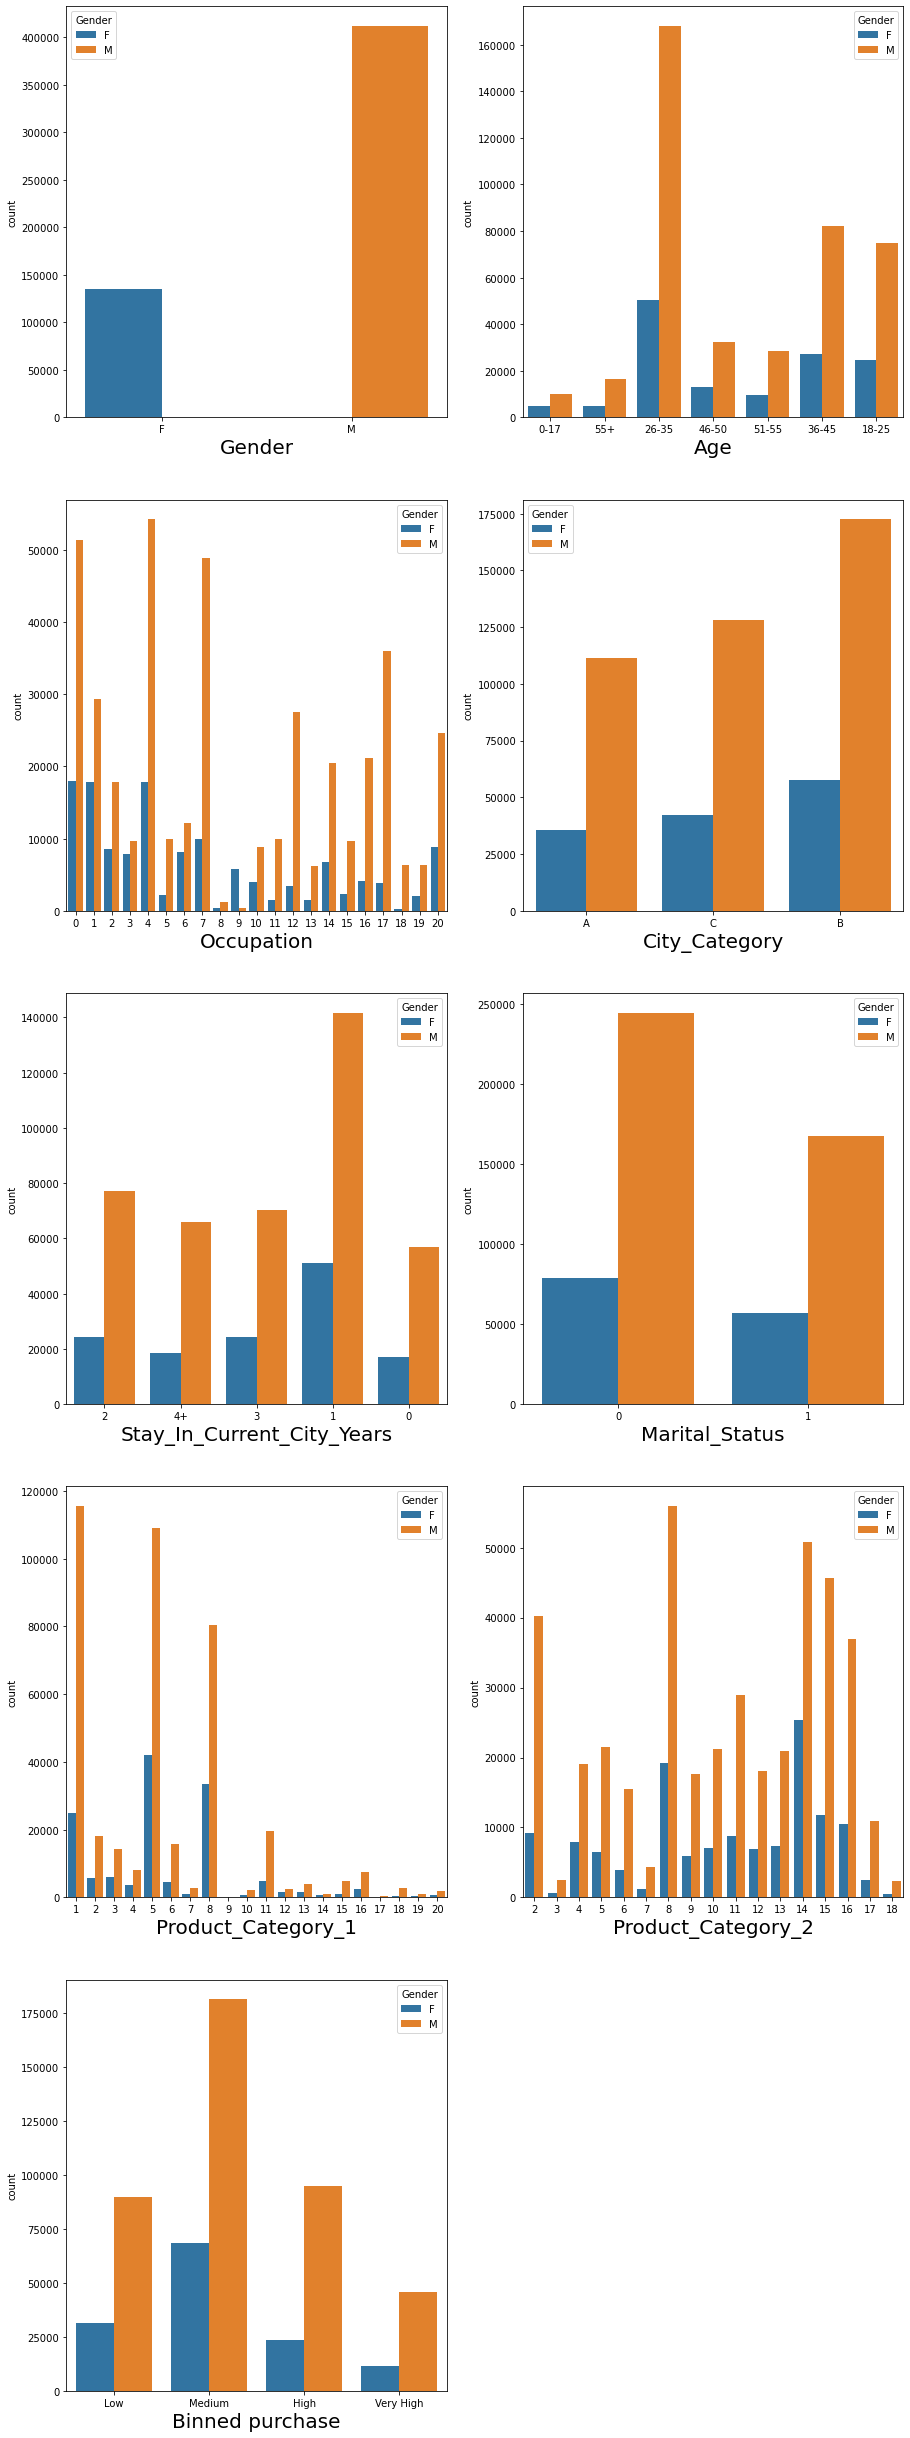

In [43]:
plt.figure(figsize=(15,180))
plotnumber = 1
for i in catogorical_column:
    if plotnumber<=40:
        ax = plt.subplot(20,2,plotnumber)
        sns.countplot(x=train_df[i],hue=train_df["Gender"])
        plt.xlabel(i,fontsize=20)
    plotnumber += 1

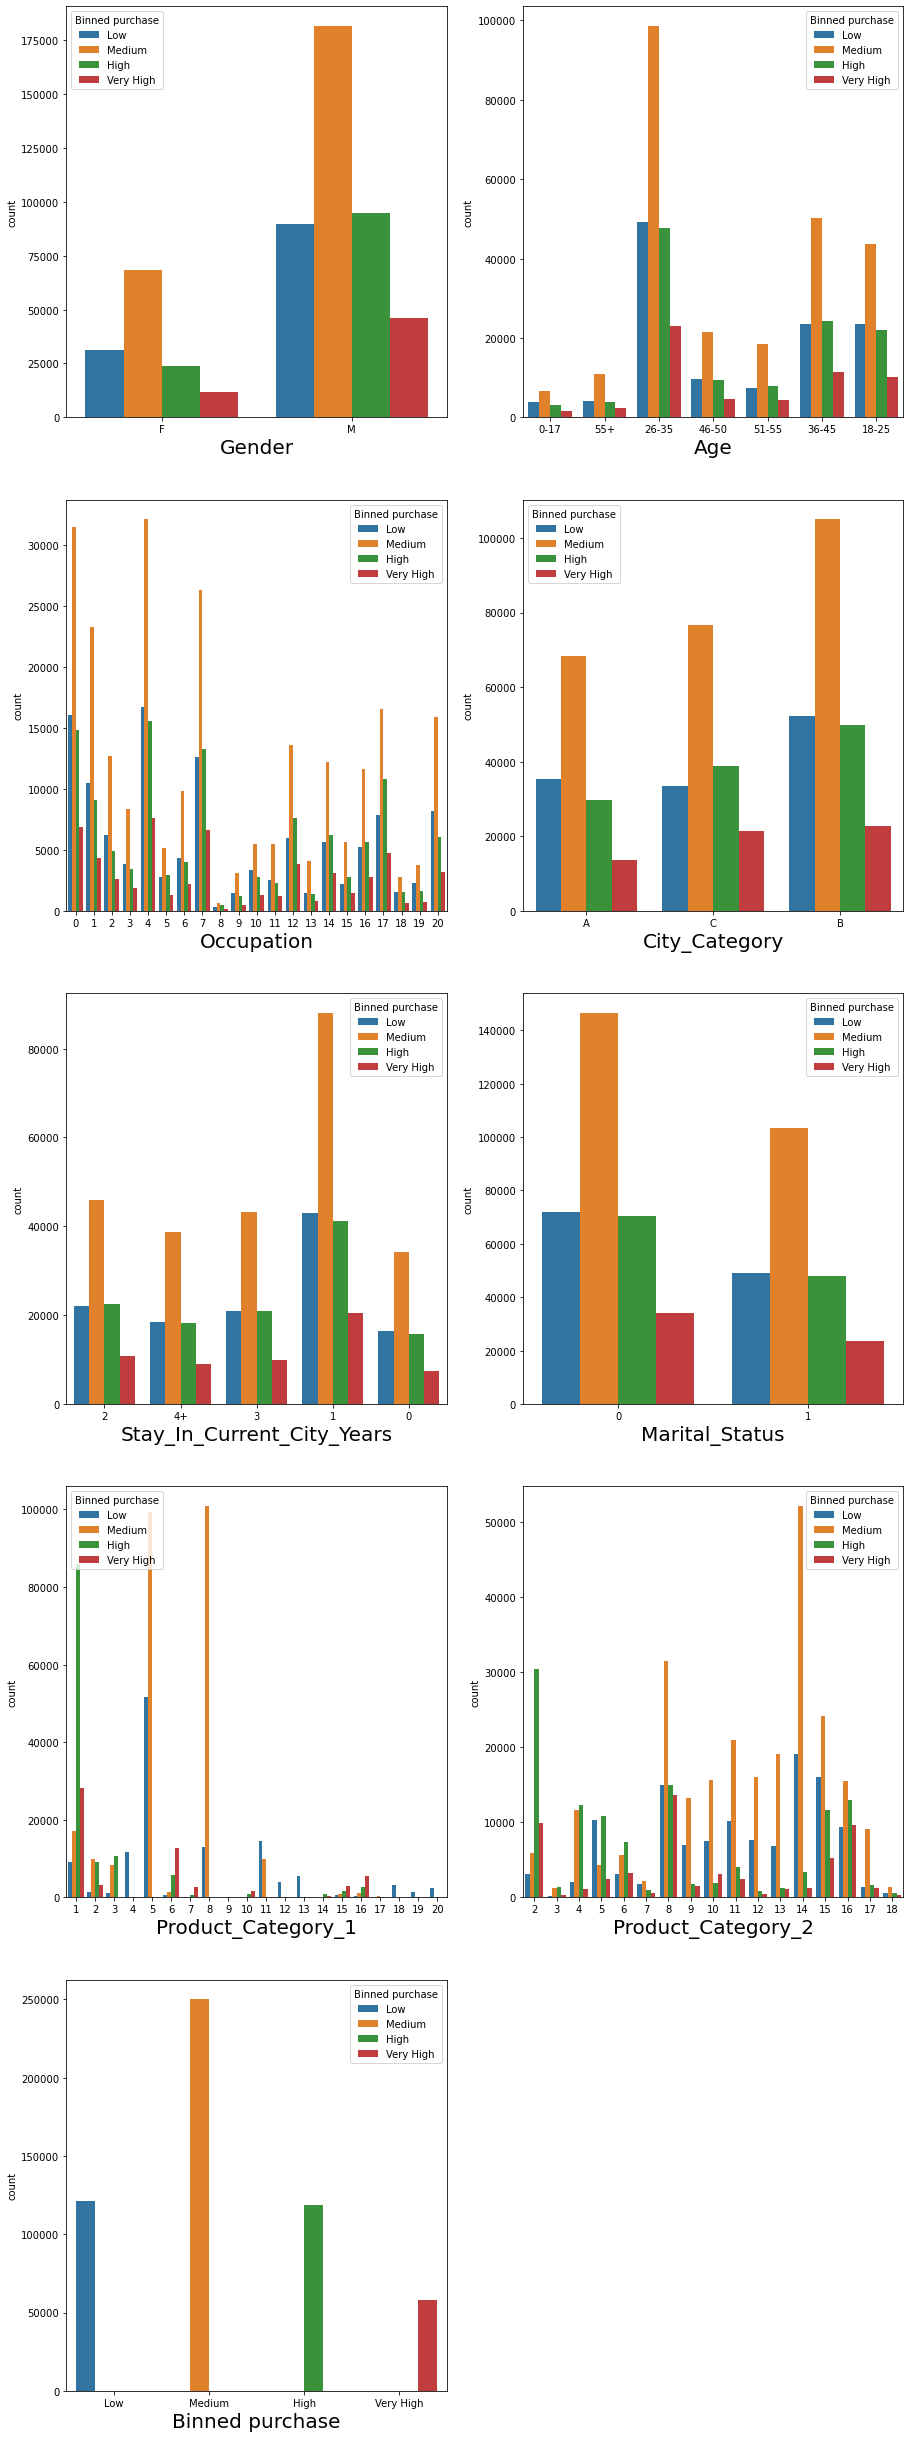

In [44]:
plt.figure(figsize=(15,180))
plotnumber = 1
for i in catogorical_column:
    if plotnumber<=40:
        ax = plt.subplot(20,2,plotnumber)
        sns.countplot(x=train_df[i],hue=train_df["Binned purchase"])
        plt.xlabel(i,fontsize=20)
    plotnumber += 1

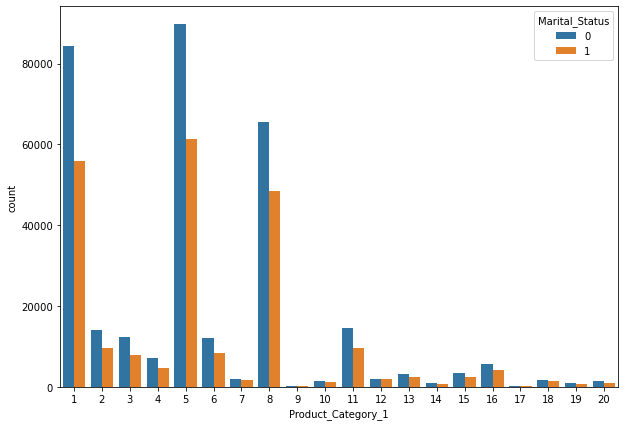

In [45]:
plt.figure(figsize=(10,7))
sns.countplot(x = train_df["Product_Category_1"],hue=train_df['Marital_Status'],data=train_df)
plt.show()

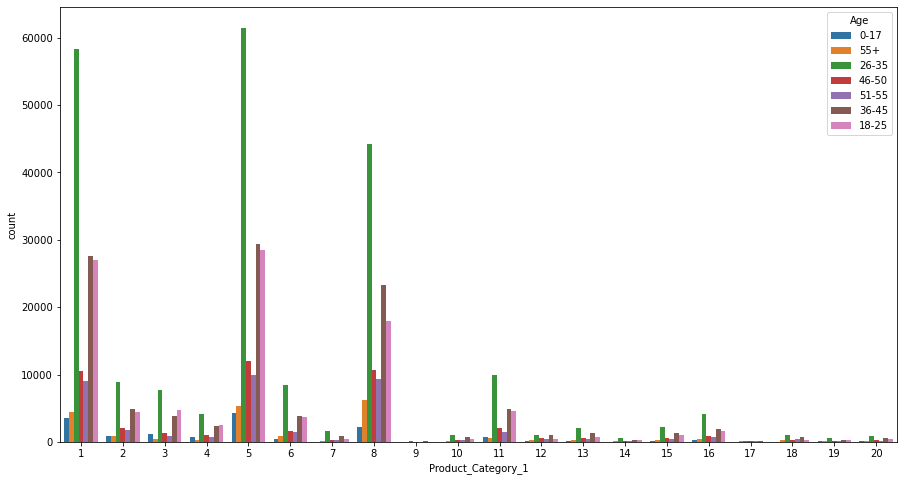

In [46]:
plt.figure(figsize=(15,8))
sns.countplot(x = train_df["Product_Category_1"],hue=train_df['Age'],data=train_df)
plt.show()

In [47]:
pd.crosstab([train_df["Product_Category_1"]],[train_df['Age']], margins=True)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Product_Category_1,,,,,,,,
1,3585,26962,58249,27648,10474,9049,4411,140378
2,805,4428,8928,4912,2105,1781,905,23864
3,1200,4710,7662,3854,1376,924,487,20213
4,758,2463,4192,2354,990,678,318,11753
5,4330,28522,61473,29377,11971,9893,5367,150933
6,399,3749,8485,3899,1622,1450,862,20466
7,53,481,1651,809,327,266,134,3721
8,2258,17911,44256,23296,10656,9340,6208,113925
9,15,48,123,94,26,25,4,335


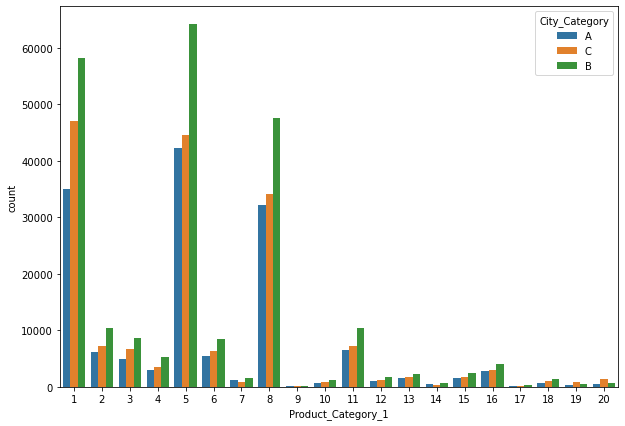

In [48]:
plt.figure(figsize=(10,7))
sns.countplot(x = train_df["Product_Category_1"],hue=train_df['City_Category'],data=train_df)
plt.show()

In [49]:
pd.crosstab([train_df["Product_Category_1"]],[train_df['City_Category']], margins=True)

City_Category,A,B,C,All
Product_Category_1,,,,
1,35081,58253,47044,140378
2,6141,10444,7279,23864
3,4943,8587,6683,20213
4,3050,5226,3477,11753
5,42211,64138,44584,150933
6,5507,8526,6433,20466
7,1226,1599,896,3721
8,32179,47553,34193,113925
9,98,144,93,335


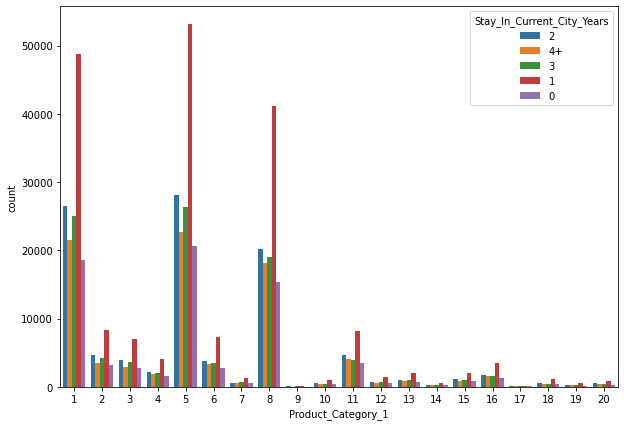

In [50]:
plt.figure(figsize=(10,7))
sns.countplot(x = train_df["Product_Category_1"],hue=train_df["Stay_In_Current_City_Years"],data=train_df)
plt.show()

In [51]:
pd.crosstab([train_df["Product_Category_1"]],[train_df["Stay_In_Current_City_Years"]], margins=True)

Stay_In_Current_City_Years,0,1,2,3,4+,All
Product_Category_1,,,,,,
1,18555,48819,26513,24981,21510,140378
2,3200,8379,4610,4230,3445,23864
3,2789,7008,3912,3585,2919,20213
4,1587,4099,2134,2102,1831,11753
5,20600,53102,28106,26372,22753,150933
6,2737,7266,3733,3441,3289,20466
7,558,1291,601,690,581,3721
8,15341,41154,20238,19074,18118,113925
9,48,109,68,65,45,335


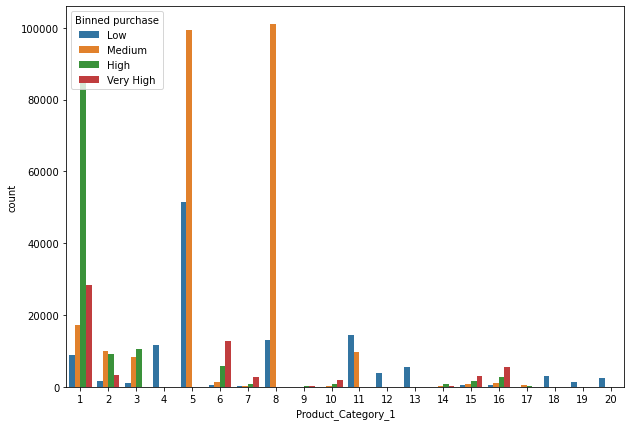

In [52]:
plt.figure(figsize=(10,7))
sns.countplot(x = train_df["Product_Category_1"],hue=train_df["Binned purchase"],data=train_df)
plt.show()

### observation
1. in product catogory type 1 maximum product purchase value is high it's falls around 10000 to 16000 purchase amount.
2. there were no purchases in the medium, high, or very high levels of purchase intensity categories for Category 4,12,13,18,19 and 20 suggests that shoppers may not be willing to spend a lot of money on products in this category.
3. The majority of purchases fall into the high and medium levels of purchase amount categories.
4. Both Category  5 and Category 8 poducts have a relatively high number of purchases overall, suggesting that these categories may be popular among shoppers and in both category product many shoppers are willing to spend a moderate amount of money on products in these categories.
5. Category 6 had a relatively high number of purchases in the very high level of purchase amount, with 12,750 purchases falling into this category. This suggests that there may be a subset of shoppers who are willing to spend a lot of money on products in this category.

In [53]:
pd.crosstab([train_df["Product_Category_1"]],[train_df["Binned purchase"]], margins=True)

Binned purchase,Low,Medium,High,Very High,All
Product_Category_1,,,,,
1,9018,17113,85926,28321,140378
2,1533,10024,9105,3202,23864
3,1147,8425,10641,0,20213
4,11753,0,0,0,11753
5,51616,99317,0,0,150933
6,516,1377,5823,12750,20466
7,124,220,683,2694,3721
8,13006,100919,0,0,113925
9,28,72,116,119,335


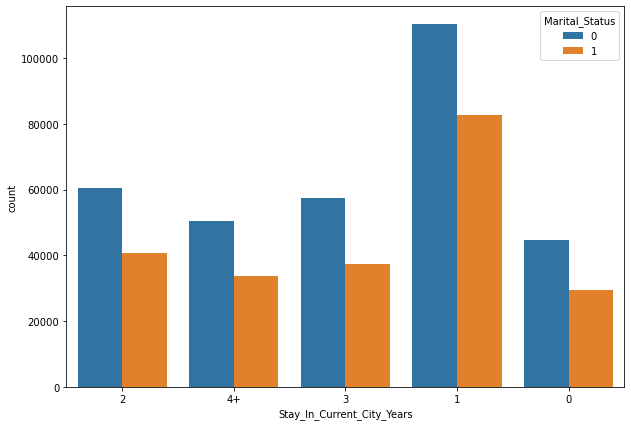

In [54]:
plt.figure(figsize=(10,7))
sns.countplot(x = train_df["Stay_In_Current_City_Years"],hue=train_df['Marital_Status'],data=train_df)
plt.show()

In [55]:
group_bin = train_df.groupby('Binned purchase')

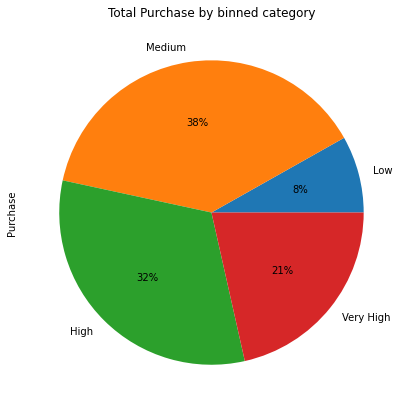

In [56]:
plt.figure(figsize=(7,7))
group_bin['Purchase'].sum().plot(kind='pie',autopct='%.0f%%')
plt.title('Total Purchase by binned category')
plt.show()

In [57]:
train_df.drop(columns=['Binned purchase',],inplace=True)
train_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,4,8370
1,F,0-17,10,A,2,0,1,6,15200
2,F,0-17,10,A,2,0,12,13,1422
3,F,0-17,10,A,2,0,12,14,1057
4,M,55+,16,C,4+,0,8,11,7969


## Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
for i in train_df:
    if train_df[i].dtype == object:
         train_df[i] = le.fit_transform(train_df[i].values.reshape(-1,1))

In [60]:
train_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0,10,0,2,0,3,4,8370
1,0,0,10,0,2,0,1,6,15200
2,0,0,10,0,2,0,12,13,1422
3,0,0,10,0,2,0,12,14,1057
4,1,6,16,2,4,0,8,11,7969


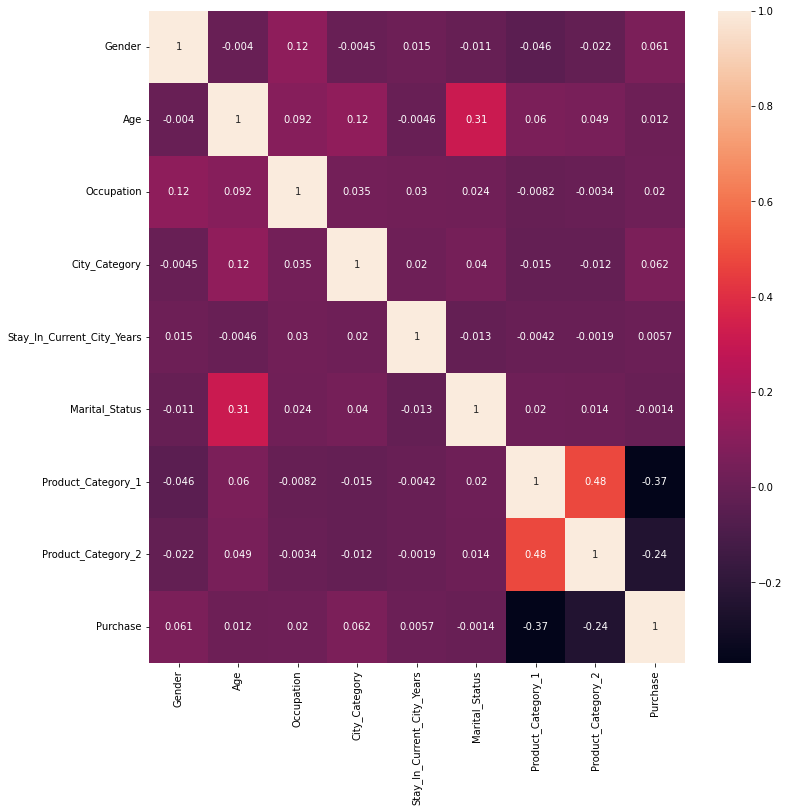

In [61]:
plt.figure(figsize=(12,12))
sns.heatmap(train_df.corr(),annot=True)
plt.show()

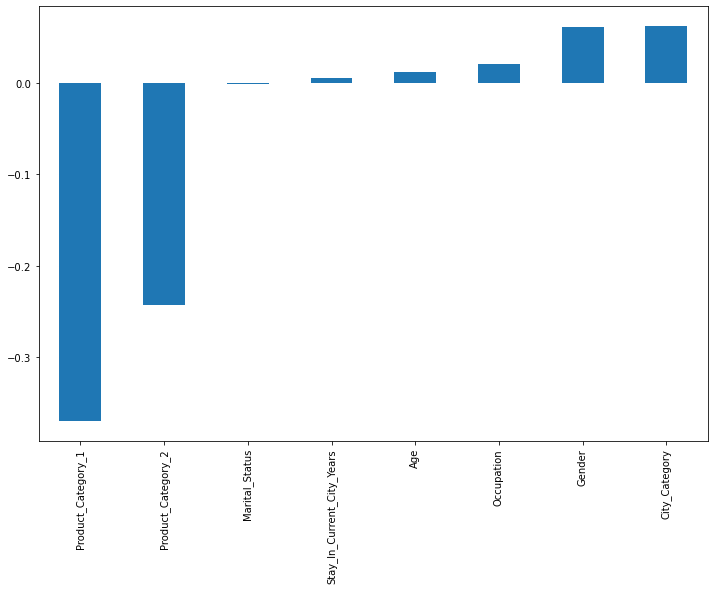

In [62]:
plt.figure(figsize=(12,8))
train_df.corr()["Purchase"].sort_values().drop(["Purchase"]).plot(kind = "bar")
plt.show()

In [63]:
train_df.corr()["Purchase"].sort_values(ascending=False).drop(["Purchase"])

City_Category                 0.062341
Gender                        0.060837
Occupation                    0.020428
Age                           0.012357
Stay_In_Current_City_Years    0.005677
Marital_Status               -0.001448
Product_Category_2           -0.242693
Product_Category_1           -0.370128
Name: Purchase, dtype: float64

In [64]:
X = train_df.drop(columns=['Purchase'])
Y = train_df['Purchase']

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(train_df,i) for i in range(train_df.shape[1])]
vif["Features"] = train_df.columns

In [69]:
vif.sort_values('vif',ascending=False)

,vif,Features
7,6.646612,Product_Category_2
1,4.665530,Age
6,3.889912,Product_Category_1
8,3.832510,Purchase
0,3.677121,Gender
4,2.827617,Stay_In_Current_City_Years
3,2.806465,City_Category
2,2.522463,Occupation
5,1.867778,Marital_Status


Product_category_2 feature VIF value is more than 5 in this category data may belongs to others and this column have many imputed values